<a href="https://colab.research.google.com/github/imsarang/DAA-PROJECT/blob/main/DAA_PROJECT_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [95]:
df = pd.read_csv("/content/Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104216 entries, 0 to 104215
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        104216 non-null  int64  
 1   airline           104216 non-null  object 
 2   flight            104216 non-null  object 
 3   source_city       104216 non-null  object 
 4   departure_time    104216 non-null  object 
 5   stops             104216 non-null  object 
 6   arrival_time      104216 non-null  object 
 7   destination_city  104216 non-null  object 
 8   class             104216 non-null  object 
 9   duration          104215 non-null  float64
 10  days_left         104215 non-null  float64
 11  price             104215 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 9.5+ MB


In [39]:
# dropping the unnamed column
df  = df.drop("Unnamed: 0",axis=1)
temp_df = df.copy()

# **FINDING THE NUMBER OF ROWS AND COLUMNS**


In [40]:
#showing number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104216 entries, 0 to 104215
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           104216 non-null  object 
 1   flight            104216 non-null  object 
 2   source_city       104216 non-null  object 
 3   departure_time    104216 non-null  object 
 4   stops             104216 non-null  object 
 5   arrival_time      104216 non-null  object 
 6   destination_city  104216 non-null  object 
 7   class             104216 non-null  object 
 8   duration          104215 non-null  float64
 9   days_left         104215 non-null  float64
 10  price             104215 non-null  float64
dtypes: float64(3), object(8)
memory usage: 8.7+ MB


In [41]:
print("Total number of rows in our dataset : ",df.count()["airline"])
print("Total number of columns in our dataset : ",len(df.axes[1]))


Total number of rows in our dataset :  104216
Total number of columns in our dataset :  11


# **COUNT THE NUMBER OF MISSING VALUES**

In [42]:
print("Total number of missing values are : ", df.isnull().sum())

Total number of missing values are :  airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            1
days_left           1
price               1
dtype: int64


In [43]:
print("Total number of missing values : ",df.isnull().sum().sum())

Total number of missing values :  3


# **CALCULATING NUMBER OF OUTLIERS**


In [44]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
print("Total Number of Outliers for each column \n",((temp_df < (q1 - 1.5 * iqr)) | (temp_df > (q3 + 1.5 * iqr))).sum())
print("\n")
print("Total Number of outliers : ",((temp_df < (q1 - 1.5 * iqr)) | (temp_df > (q3 + 1.5 * iqr))).sum().sum())

Total Number of Outliers for each column 
 airline                0
arrival_time           0
class                  0
days_left              0
departure_time         0
destination_city       0
duration             953
flight                 0
price               7036
source_city            0
stops                  0
dtype: int64


Total Number of outliers :  7989


In [45]:
# checking for duplicate data:
temp_df.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
104211    False
104212    False
104213    False
104214    False
104215    False
Length: 104216, dtype: bool

Thus, our dataset doesnot have any duplicate data

# **DATA PREPROCESSING**

In [48]:
temp_df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left           float64
price               float64
dtype: object

In [58]:
df = df.dropna()
temp_df = df.copy()
# since there were only 3 missing values in our dataset, and these values do not significantly contribute to the dataset,we drop the rows with the missing values. 

In [56]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# **Principal Component Analysis**

# **DIMENSIONALITY REDUCTION**

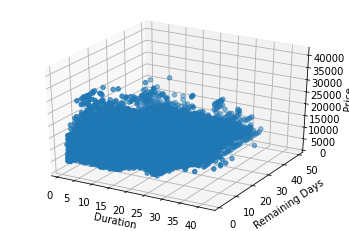

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(temp_df['duration'], temp_df['days_left'],temp_df['price'], marker='o')
ax.set_xlabel('Duration')
ax.set_ylabel('Remaining Days')
ax.set_zlabel('Price')
plt.show()

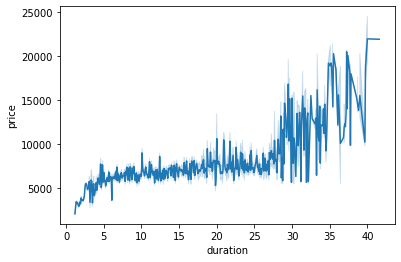

In [60]:
sns.lineplot(data=temp_df,x='duration',y='price')

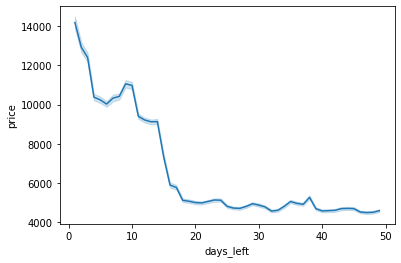

In [63]:
sns.lineplot(data=temp_df,x='days_left',y='price')

**Thus using  dimensionality reduction helps us better see the pattern of increasing price as the duration of the flight increases,also the price tends to increase drastically as the ticket is booked closer to the departure date**

**Thus,PCA helps us in visualising our dataset by reducing dimensionality(3D to 2D)**

count    104215.000000
mean       6384.752857
std        3678.470738
min        1890.000000
25%        4028.000000
50%        5547.000000
75%        7484.000000
max       40354.000000
Name: price, dtype: float64


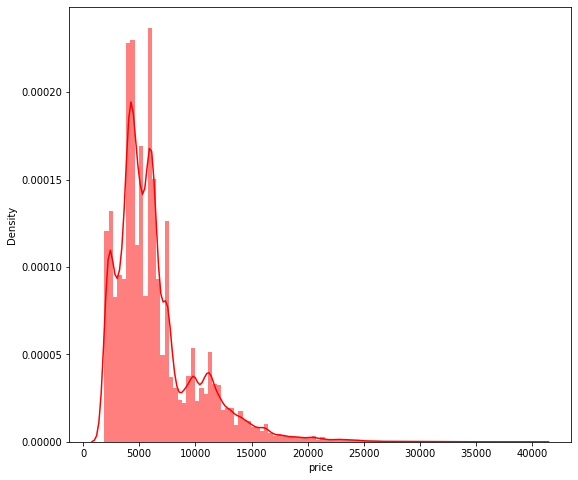

In [71]:
print(temp_df['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(temp_df['price'], color='r', bins=100, hist_kws={'alpha': 0.5});

# **CHECK FOR CORRELATION**

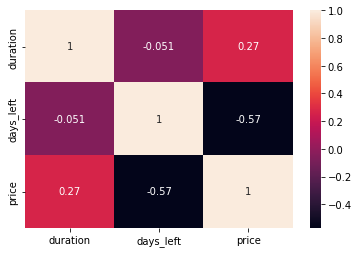

In [46]:
corr = temp_df.corr(method='pearson')
sns.heatmap(corr,annot=True)

**Correlation between days_left and price is -0.57 and duration and price is 0.27 hence we use these variables in the to plot out the variaton price with respect to the independent variables**

# **Data Visualisation**

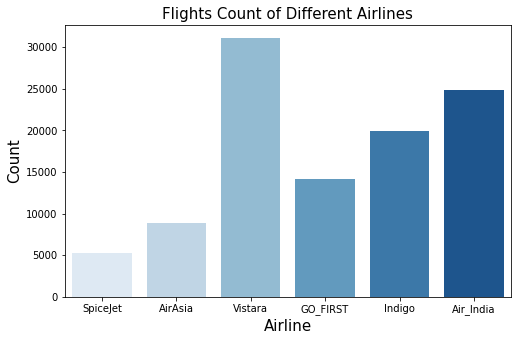

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(df['airline'],palette='Blues')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

# Hence from the count plot we can realise that highest number of flights fly under the company Vistara followed by Air_India in this dataset


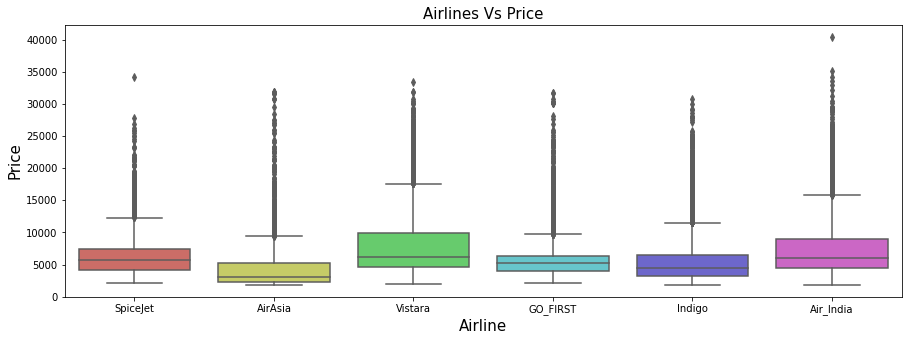

In [86]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# As we can see from the plot that prices in vistara generally tend to be higher compared to other airlines.

# The cheapest airline for travel tends to be AirAsia

# **Variation of ticket prices with the number of stops **

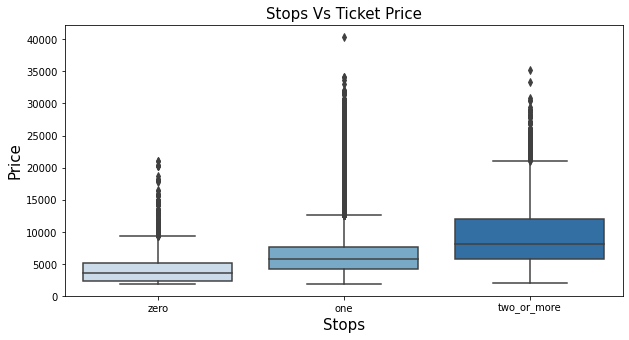

In [92]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='Blues')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# Hence tickets with two or more values tend to have more prices




# Source City Vs Ticket Price

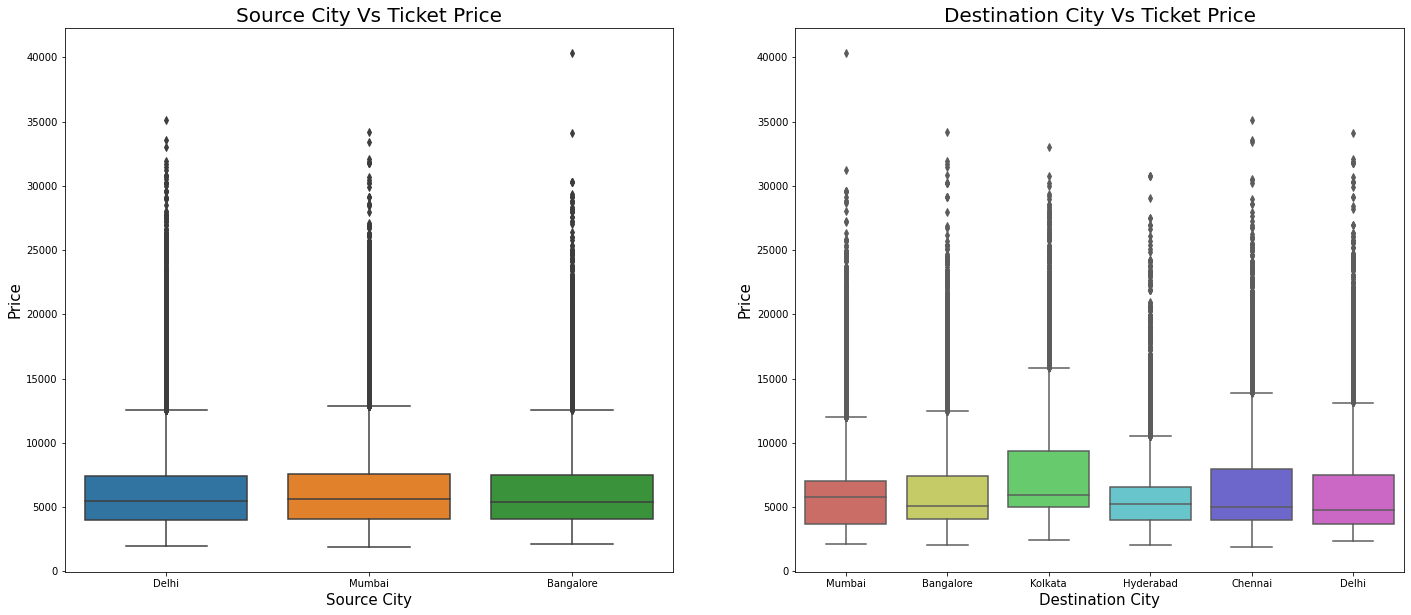

In [93]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

The Ticket price is almost the same irrespective of the source,where as for destination,Kolkata tends to have the highest price.

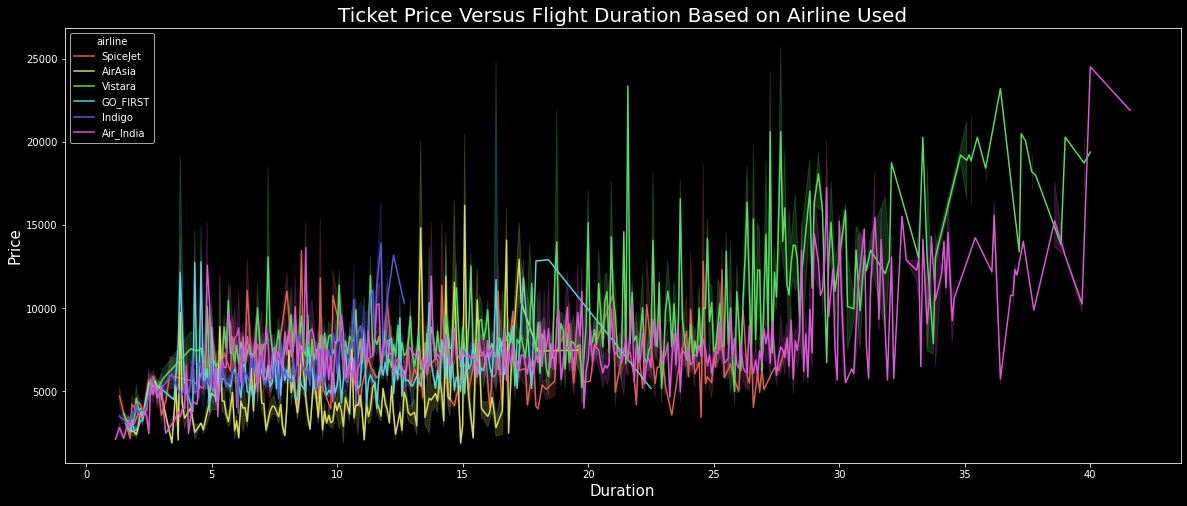

In [98]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='airline',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Airline Used',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()